In [1]:
import os, glob
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata as ad

In [2]:
summary_fn =  os.path.join('..', 'data', 'summary.csv')
features_fn = os.path.join('..', '03_signatures', 'results', 'biomart.csv')
summary_df = pd.read_csv(summary_fn, index_col = 0)
features_df = pd.read_csv(features_fn)
species_dict = summary_df['species'].to_dict()
adata_fn = sorted(glob.glob(os.path.join('..', 'data', 'processed', '*', '*.h5ad')))
adata_dir = [os.path.split(fn)[0] for fn in adata_fn]
adata_dict = {os.path.split(adata_dir[i])[1] : fn for i, fn in enumerate(adata_fn)}
for key in adata_dict:
    adata = sc.read_h5ad(adata_dict[key])
    species = species_dict[key]
    features_msk = adata.var_names.isin(features_df[species])
    adata = adata[:, features_msk]
    if species != 'mmusculus':
        features_dict = features_df.set_index(species).mmusculus.to_dict()
        adata.var_names = adata.var_names.map(features_dict)
    adata_dict[key] = adata
    print(key, adata_dict[key])

GSE136689 View of AnnData object with n_obs × n_vars = 10097 × 689
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
GSE162534 View of AnnData object with n_obs × n_vars = 8725 × 710
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'celltype_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
GSE201257 View of 

In [3]:
adata = ad.concat(adata_dict, merge = 'same', label = 'source')
adata.obs_names_make_unique()
adata

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/merge.py:1434: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 168295 × 668
    obs: 'celltype', 'source'
    obsm: 'X_pca', 'X_umap'

In [4]:
adata = adata[~adata.obs.celltype.isna()]
adata

View of AnnData object with n_obs × n_vars = 140799 × 668
    obs: 'celltype', 'source'
    obsm: 'X_pca', 'X_umap'

In [5]:
sc.pp.scale(adata)
sc.pp.pca(adata)

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
sce.pp.harmony_integrate(adata, 'source', lamb = .1)

2025-05-24 00:00:33,559 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2025-05-24 00:00:45,382 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-24 00:00:46,649 - harmonypy - INFO - Iteration 1 of 10
2025-05-24 00:02:09,908 - harmonypy - INFO - Iteration 2 of 10
2025-05-24 00:03:18,013 - harmonypy - INFO - Iteration 3 of 10
2025-05-24 00:04:29,865 - harmonypy - INFO - Converged after 3 iterations


In [9]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony')
sc.tl.umap(adata)

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


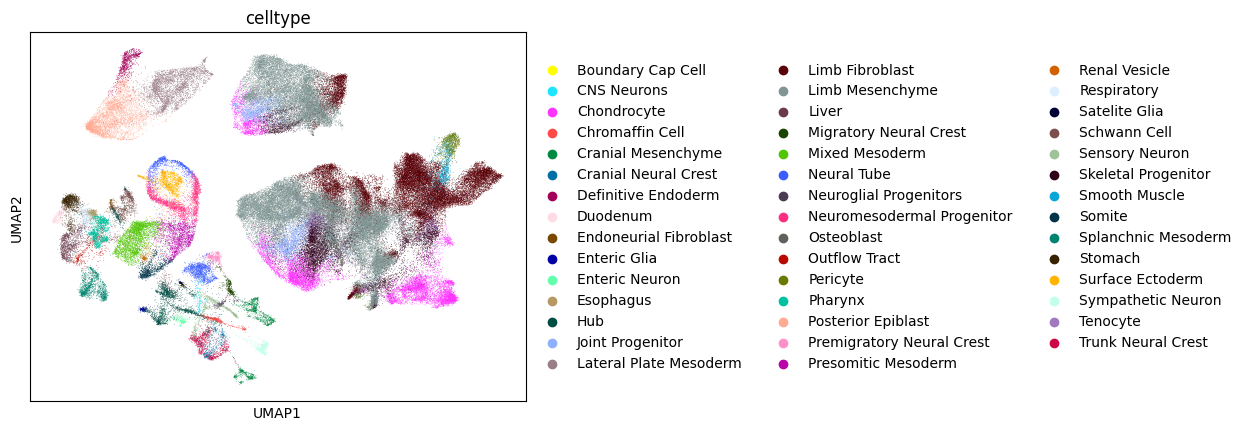

In [10]:
sc.pl.umap(adata, color = 'celltype')

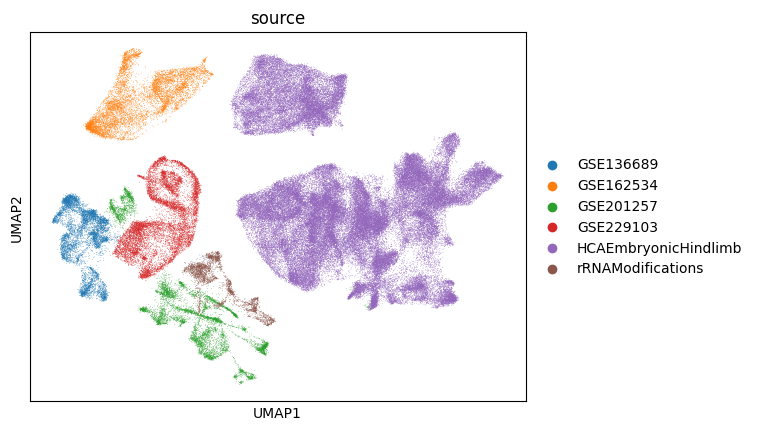

In [12]:
sc.pl.umap(adata, color = 'source')